# Análise de dados materiais de agricultura

A análise de dados exerce uma função significativa na agricultura atual, contribuindo com decisões orientadas a dados que tornam possível maiores eficiências , menores custos e maximização da produção. Por meio da análise dos preços de materiais agrícolas, como lã , madeira, borracha , se faz possível encontrar tendências, interpretar variações sazonais e prever oscilações futuras. Este projeto tramita oferecer uma análise detalhada para um conjunto de dados que contém informações sobre cada um dos materiais, com vistas a encontrar insights úteis para decisões. 

## Bibliotecas utilizadas

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

## Importação do dataframe

In [2]:
df = pd.read_csv('agricultural_raw_material.csv')

In [3]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


## Tratamento dos dados

In [5]:
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [6]:
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)

In [7]:
df = df.replace('', np.nan)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [10]:
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


In [11]:
variaveis_numericas = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[variaveis_numericas] = df[variaveis_numericas].astype("float")

In [12]:
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [13]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [14]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.00,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
323,Mar17,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,Apr17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00
325,May17,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,...,486.59,1.87,2.10,4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [15]:
#Tratando as datas
# Primeiro transforma tudo em letra maiuscula df.Month.str.upper()
#converte string para datatime pd.to_datetime()
# parametros:  O formato %b%y significa que o campo está em formato de mês abreviado (três letras, ex.: JAN) seguido de dois dígitos para o ano (ex.: 23 para 2023). yearfirst=False indica que o mês vem antes do ano.
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# transforma a coluna month em index
df = df.set_index('Month')

In [16]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## Matriz de correlação

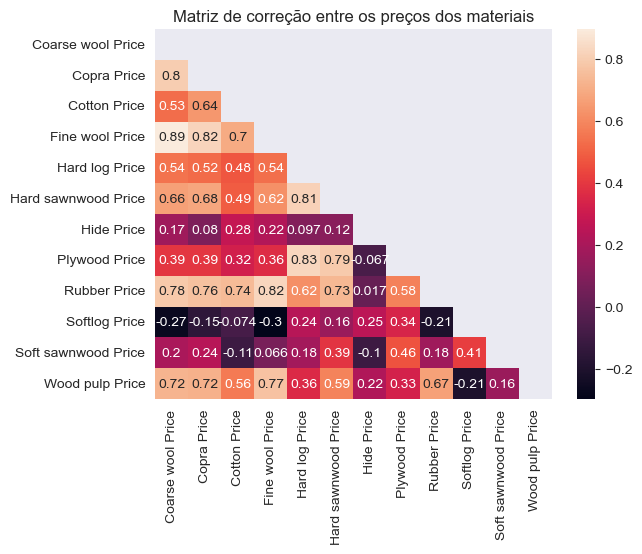

In [52]:
materias_primas=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
matriz_corr = df[materias_primas].corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(matriz_corr, mask=mask,annot = True)
plt.title('Matriz de correção entre os preços dos materiais')
plt.show()

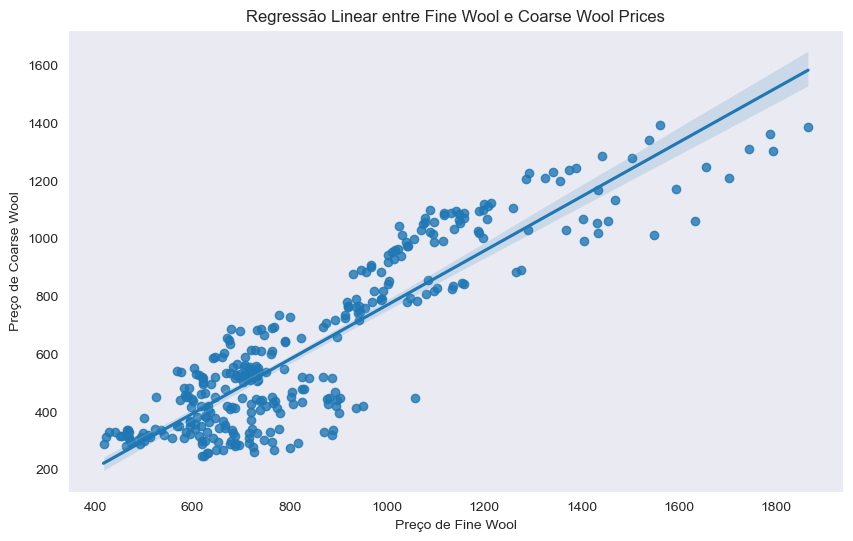

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='Fine wool Price', y='Coarse wool Price', data=df)
plt.title('Regressão Linear entre Fine Wool e Coarse Wool Prices')
plt.xlabel('Preço de Fine Wool')
plt.ylabel('Preço de Coarse Wool')
plt.show()

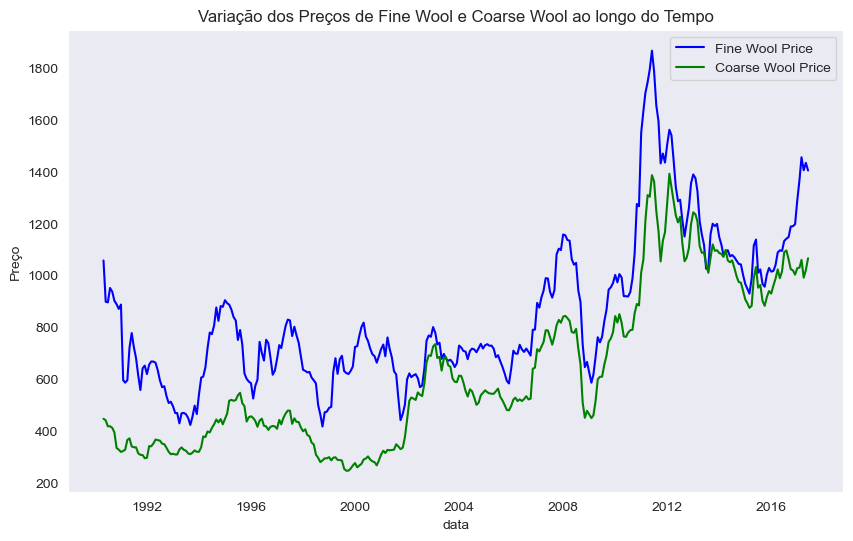

In [59]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Fine wool Price'], label='Fine Wool Price', color='b')
plt.plot(df.index, df['Coarse wool Price'], label='Coarse Wool Price', color='g')
plt.title('Variação dos Preços de Fine Wool e Coarse Wool ao longo do Tempo')
plt.xlabel('data')
plt.ylabel('Preço')
plt.legend()
plt.show()

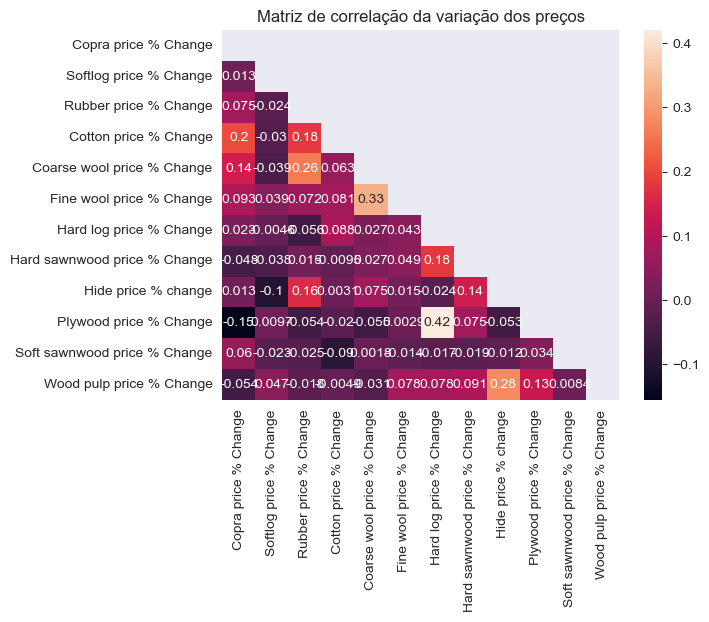

In [53]:
varia_preco = ['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
corrMatrix = df[varia_preco].corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, mask = mask, annot=True)
plt.title('Matriz de correlação da variação dos preços')
plt.show()

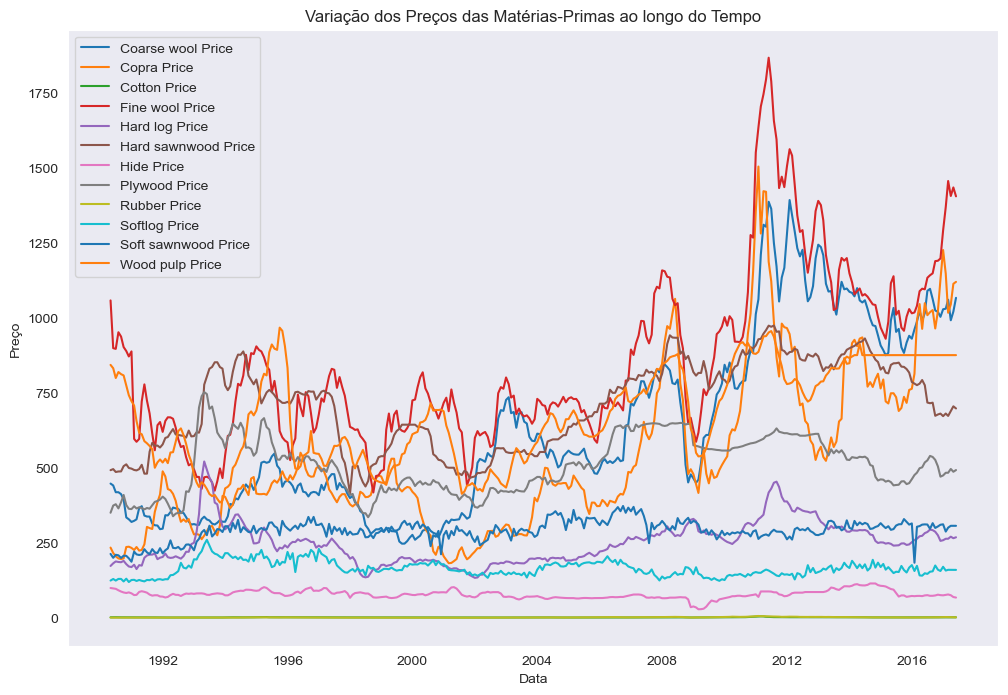

In [60]:
plt.figure(figsize=(12,8))

for material in materias_primas:
    plt.plot(df.index, df[material], label=material)

plt.title('Variação dos Preços das Matérias-Primas ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.legend(loc='best')

plt.show()


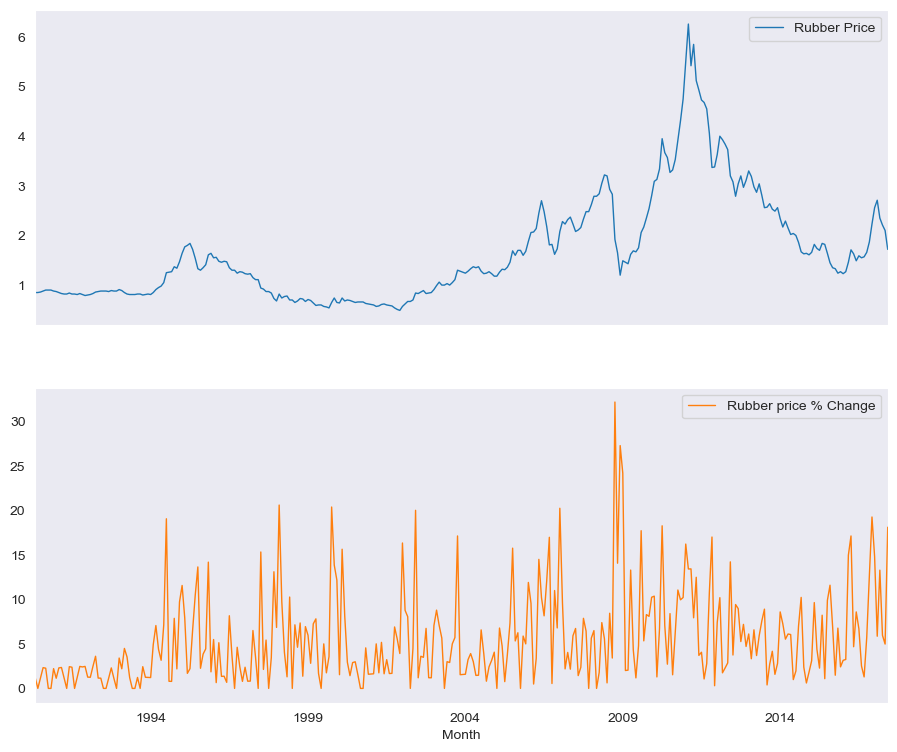

In [38]:
axes=df[["Rubber Price", "Rubber price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)


In [39]:
media_preco = df[materias_primas].mean()

# Selecionando as 5 matérias-primas com os maiores preços
top_5_materials = media_preco.nlargest(5).index
print(top_5_materials)

Index(['Fine wool Price', 'Hard sawnwood Price', 'Wood pulp Price',
       'Coarse wool Price', 'Copra Price'],
      dtype='object')


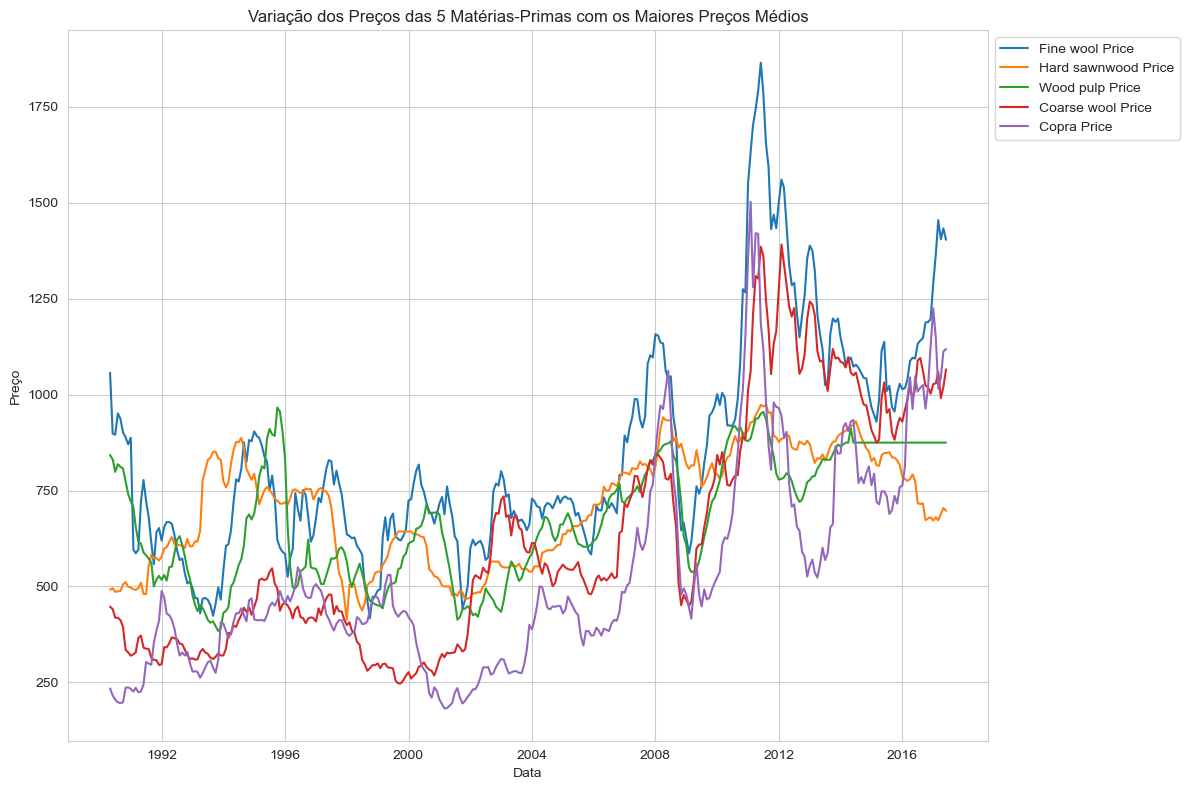

In [61]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))

for material in top_5_materials:
    plt.plot(df.index, df[material], label=material)

plt.title('Variação dos Preços das 5 Matérias-Primas com os Maiores Preços Médios')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

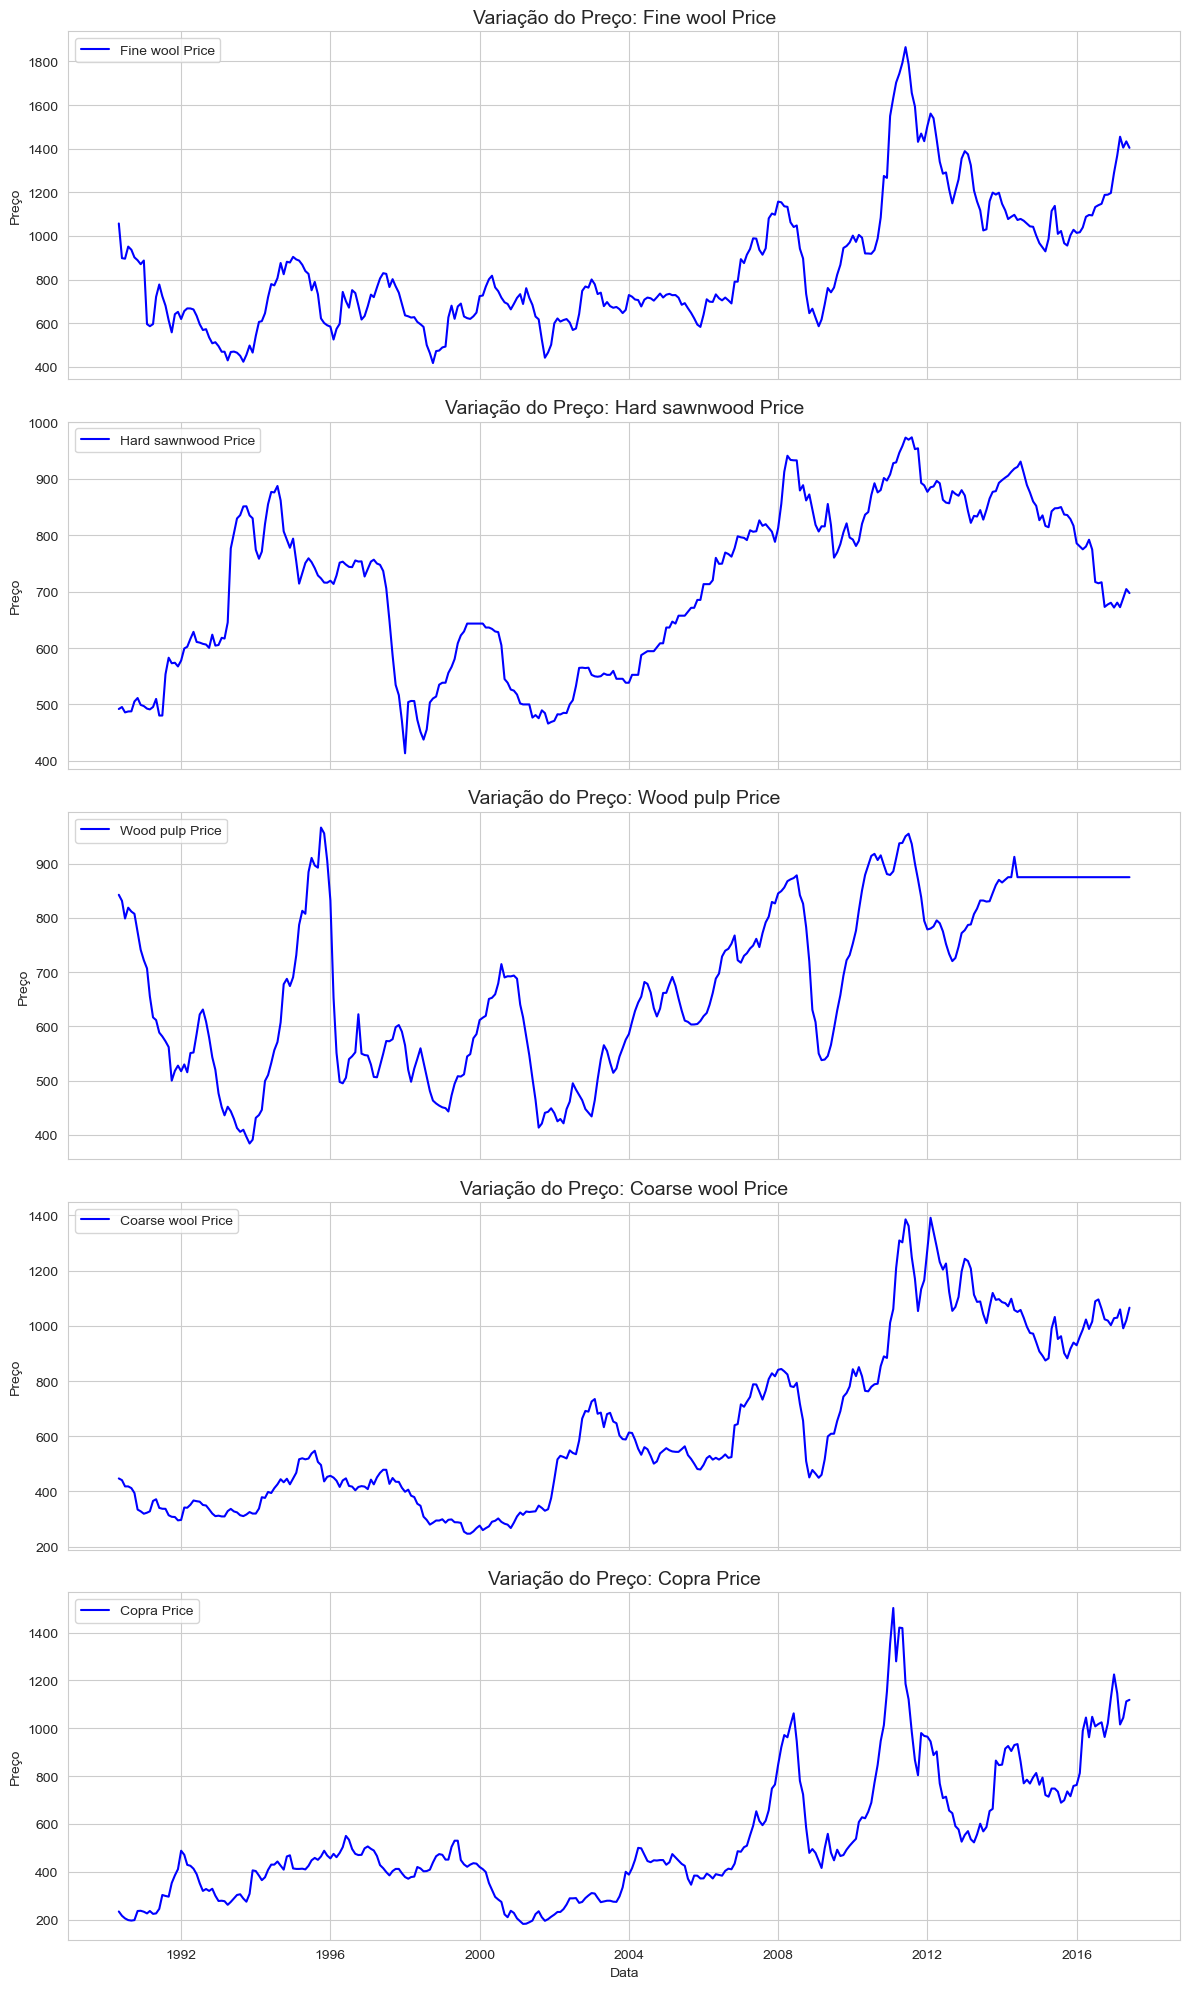

In [62]:
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

for i, material in enumerate(top_5_materials):
    axs[i].plot(df.index, df[material], label=material, color='b')
    axs[i].set_title(f'Variação do Preço: {material}', fontsize=14)
    axs[i].set_ylabel('Preço')
    axs[i].legend(loc='upper left')

axs[4].set_xlabel('Data')

plt.tight_layout()

plt.show()

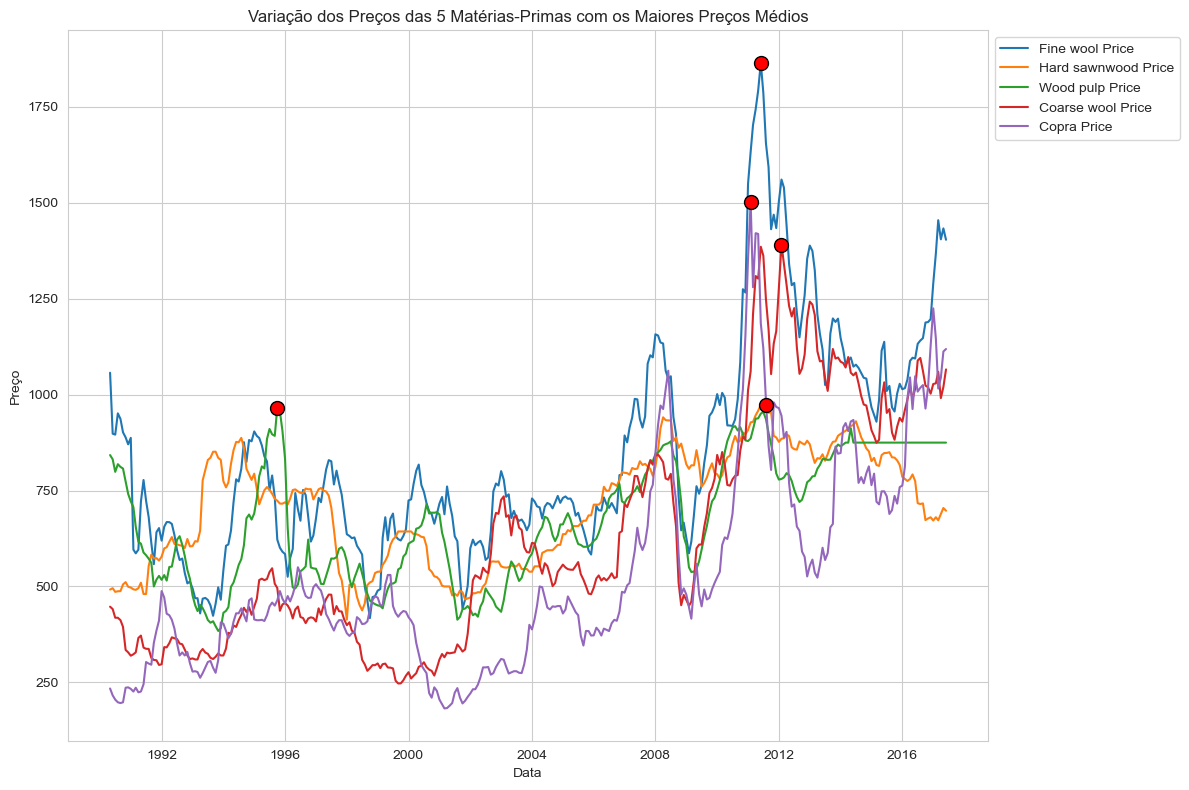

In [63]:
plt.figure(figsize=(12,8))

for material in top_5_materials:
    plt.plot(df.index, df[material], label=material)
    
    max_idx = df[material].idxmax()
    max_value = df[material].max()
    
    plt.scatter(max_idx, max_value, color='red', s=100, zorder=5, edgecolor='black', label=f'{material} Max' if material not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title('Variação dos Preços das 5 Matérias-Primas com os Maiores Preços Médios')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

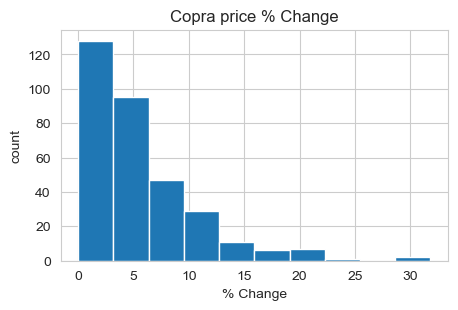

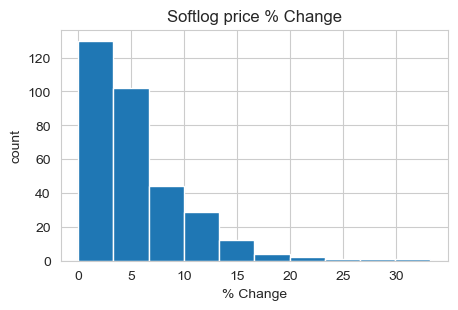

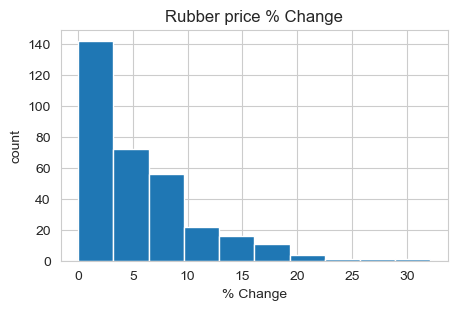

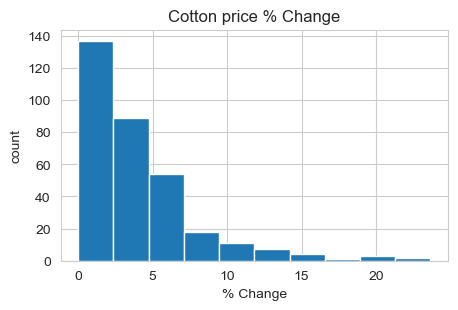

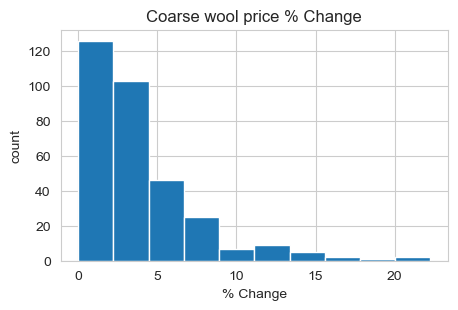

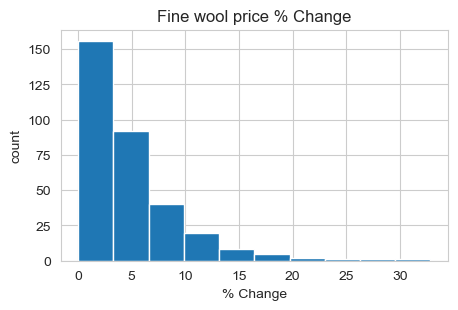

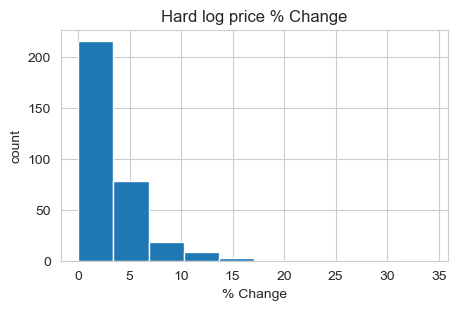

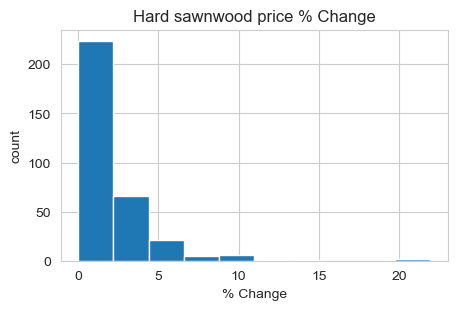

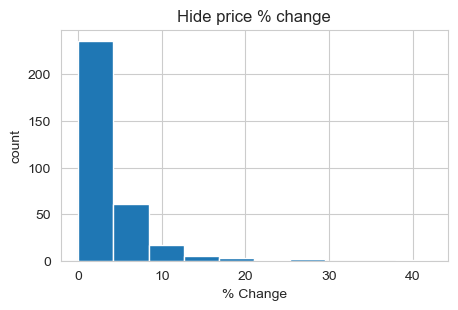

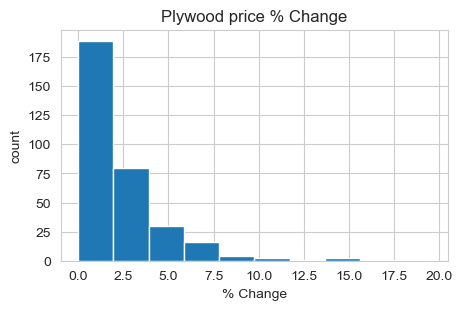

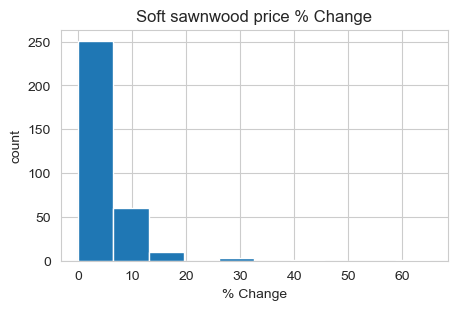

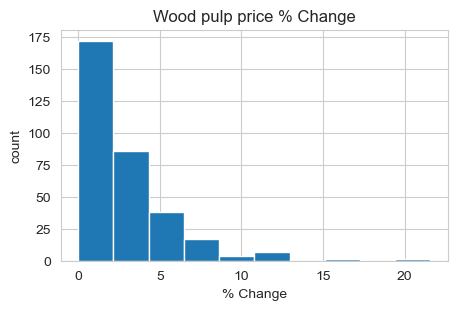

In [64]:
for i in range(len(varia_preco)):
    plt.figure(figsize=(3,3))
    df[varia_preco[i]].hist(figsize=(5, 3), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.title(varia_preco[i]) 
    plt.show()

Compreensão da Volatilidade do Mercado:

Objetivo: Avaliar a volatilidade e o risco associados a cada matéria-prima.
Exemplo: Matérias-primas com histogramas que mostram uma ampla gama de variações percentuais podem ser consideradas mais arriscadas ou voláteis, enquanto aquelas com distribuições mais concentradas podem ser vistas como mais estáveis.

Esses insights podem ser úteis para decisões de investimento, gestão de risco, planejamento de compras, e outras estratégias relacionadas ao mercado de matérias-primas.Podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

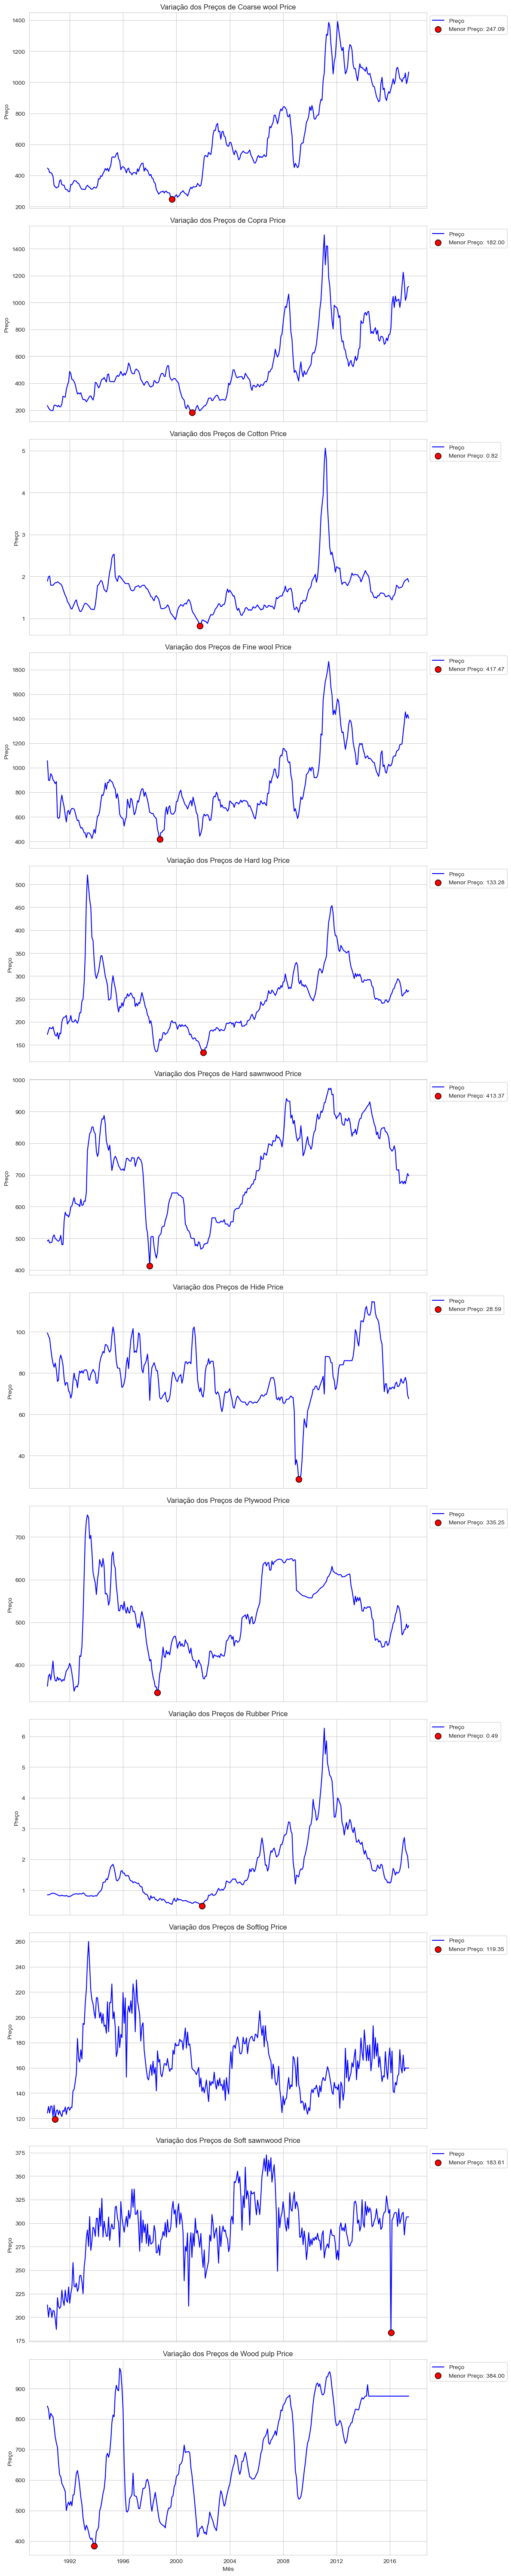

In [65]:
num_materials = len(materias_primas)
fig, axs = plt.subplots(num_materials, 1, figsize=(12, num_materials * 5), sharex=True)

for i, material in enumerate(materias_primas):
    ax = axs[i]
    ax.plot(df.index, df[material], label='Preço', color='blue')
    
    min_idx = df[material].idxmin()
    min_value = df[material].min()
    
    ax.scatter(min_idx, min_value, color='red', s=100, zorder=5, edgecolor='black', label=f'Menor Preço: {min_value:.2f}')
    
    ax.set_title(f'Variação dos Preços de {material}')
    ax.set_ylabel('Preço')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

axs[-1].set_xlabel('Mês')

plt.tight_layout()
plt.show()

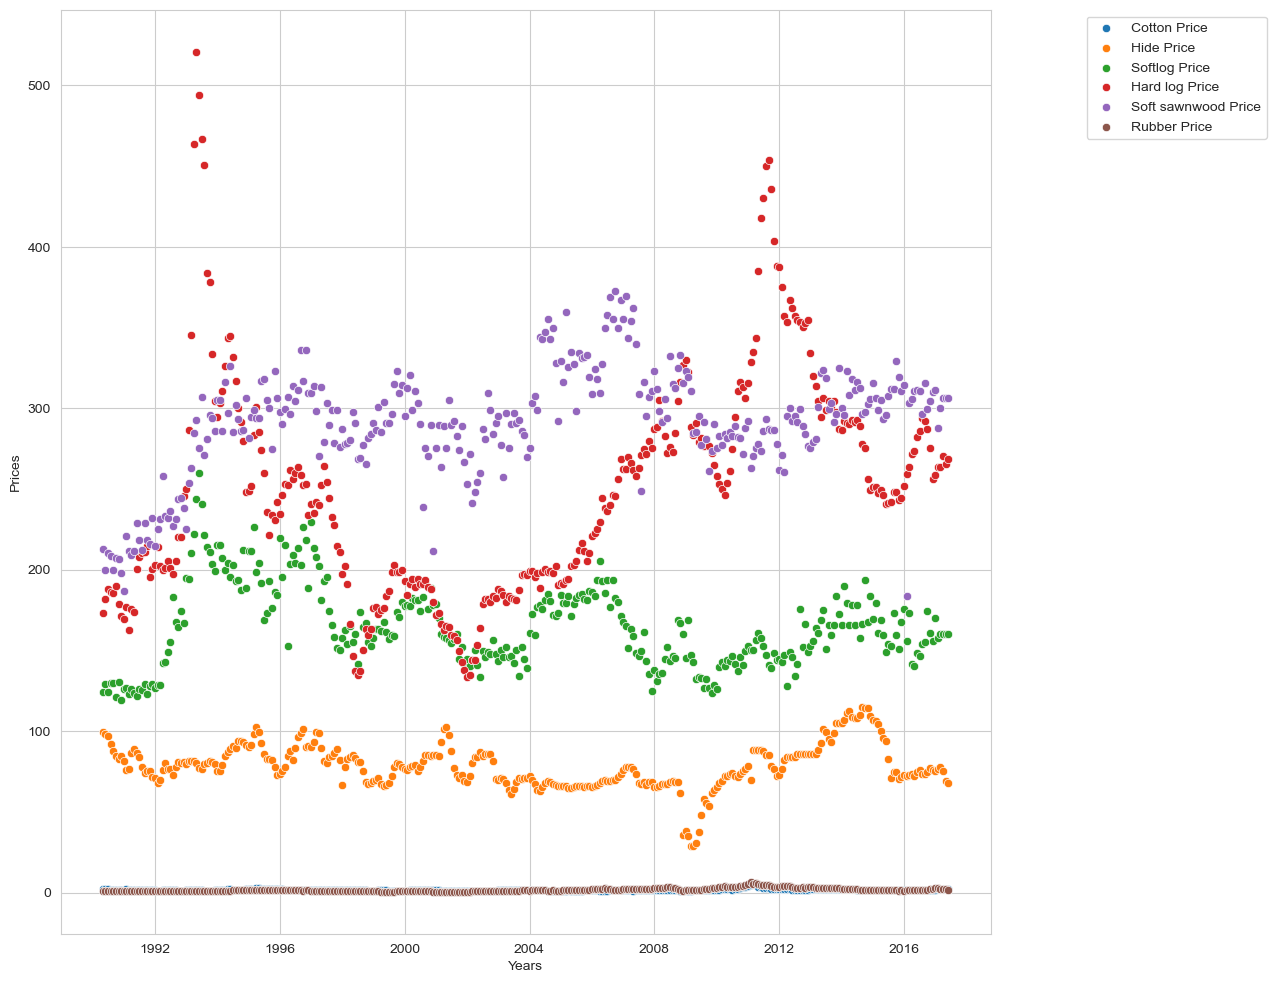

In [49]:
baixo_custo=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Preço')
plt.xlabel('Data')
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

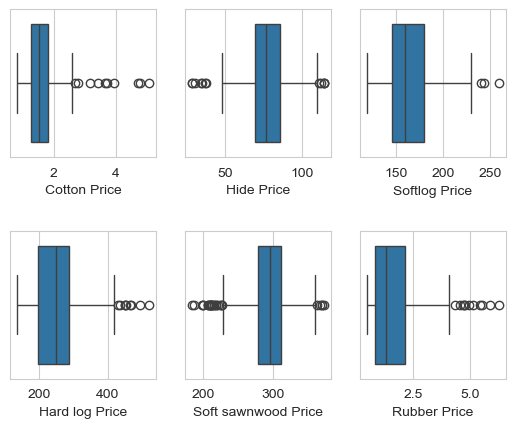

In [50]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

##Inferências e Conclusão##
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* alta e baixa % de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor

##Trabalho futuro##
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também pudemos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.